In [6]:
!pip install update pandas 


In [7]:
import pandas as pd
import plotly.express as px


In [8]:
data = pd.read_csv('./2003_2017_waste.csv')

In [9]:
print(data.head())

            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
0                 Food                   679900                    111100.0   
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
3                  C&D                     9700                   1585700.0   
4  Horticultural waste                   111500                    209000.0   

   total_waste_generated_tonne  recycling_rate  year  
0                       791000            0.14  2016  
1                      1183100            0.51  2016  
2                       822200            0.07  2016  
3                      1595400            0.99  2016  
4                       320500            0.65  2016  


In [10]:
import matplotlib.pyplot as plt

In [11]:
# Percobaan Visualisasai Data 1
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.barplot(data=data, x='year', y='total_waste_generated_tonne', hue='waste_type')
plt.title('Total Sampah Dihasilkan Setiap Tahun untuk Berbagai Jenis Sampah')
plt.xlabel('Tahun')
plt.ylabel('Total Sampah Dihasilkan (Ton)')
plt.legend(title='Jenis Sampah', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
plt.savefig('VisualisasiData.png')
plt.close()

In [12]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x='year', y='recycling_rate', hue='waste_type', marker='o')
plt.title('Tingkat Daur Ulang Setiap Tahun untuk Berbagai Jenis Sampah')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Daur Ulang')
plt.legend(title='Jenis Sampah', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [13]:
data2 = pd.read_csv('./waste_energy_stat.csv')
print(data2.head())

  The table gives the amount of energy saved in kilowatt hour (kWh) and the amount of crude oil (barrels) by recycling 1 metric tonne (1000 kilogram)  per waste type  \
0    1 barrel oil is approximately 159 litres of oil                                                                                                                    
1                                                NaN                                                                                                                    
2                                           material                                                                                                                    
3                                       energy_saved                                                                                                                    
4                                    crude_oil saved                                                                                                       

In [14]:
# Membersihkan data
# Mengambil hanya baris yang diperlukan (baris ke-3 sampai ke-4) dan menghapus kolom pertama yang tidak diperlukan
data_cleaned = data2.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

# Konversi nilai energi yang disimpan dan minyak mentah yang disimpan ke bentuk numerik
for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

# Transpose data untuk memudahkan visualisasi
data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menampilkan data yang sudah dibersihkan
print(data_cleaned)

            Material Energy_Saved_kWh Crude_Oil_Saved_Barrels
0            Plastic             5774                    16.0
1              Glass               42                    0.12
2      Ferrous Metal              642                     1.8
3  Non-Ferrous Metal            14000                    40.0
4              Paper             4100                    11.0


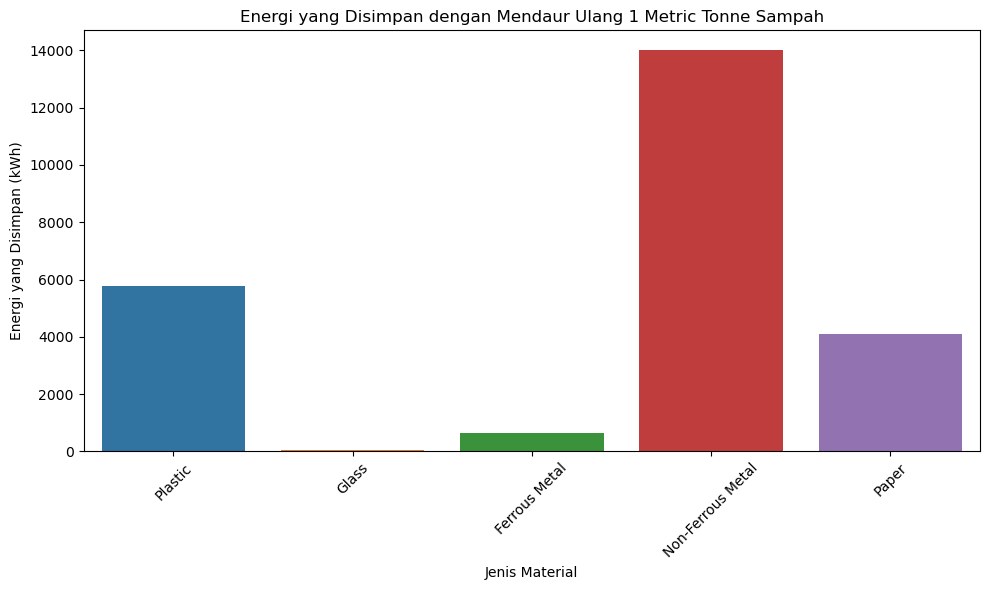

In [15]:
# Visualisasi energi yang disimpan
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='Material', y='Energy_Saved_kWh')
plt.title('Energi yang Disimpan dengan Mendaur Ulang 1 Metric Tonne Sampah')
plt.xlabel('Jenis Material')
plt.ylabel('Energi yang Disimpan (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('energy_saved.png')
plt.show()


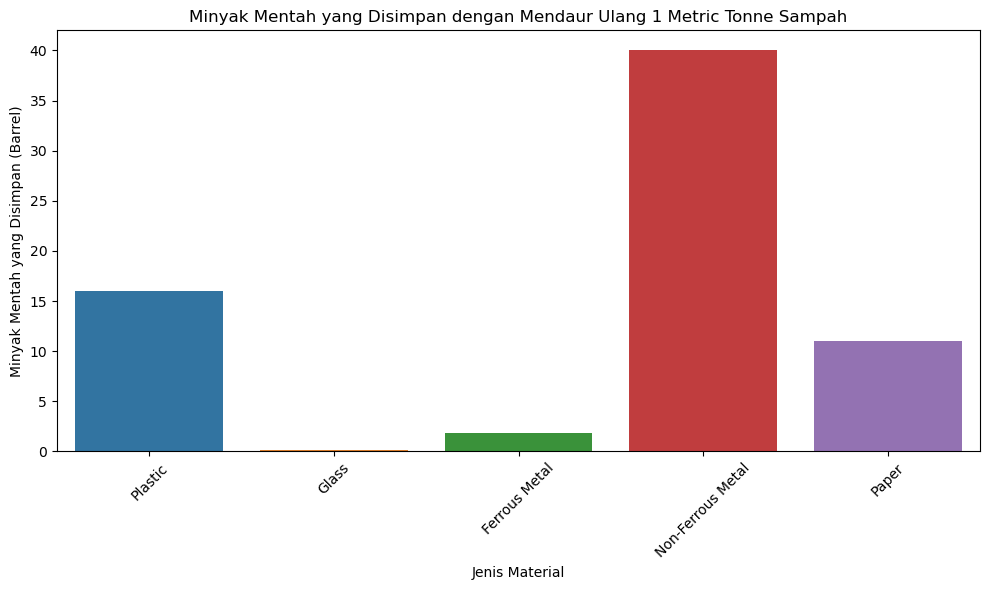

In [16]:
# Visualisasi minyak mentah yang disimpan
plt.figure(figsize=(10, 6))
sns.barplot(data=data_cleaned, x='Material', y='Crude_Oil_Saved_Barrels')
plt.title('Minyak Mentah yang Disimpan dengan Mendaur Ulang 1 Metric Tonne Sampah')
plt.xlabel('Jenis Material')
plt.ylabel('Minyak Mentah yang Disimpan (Barrel)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('crude_oil_saved.png')
plt.show()

In [17]:
# Membaca data dari file CSV
waste_data = pd.read_csv('./2003_2017_waste.csv')
energy_data = pd.read_csv('./waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat Treemap
fig = px.treemap(
    merged_data_filtered,
    path=[px.Constant('Waste'), 'year', 'Material'],
    values='total_waste_generated_tonne',
    color='Energy_Saved_kWh',
    color_continuous_scale='Viridis',
    title='Treemap of Waste Types and Energy Saved by Year'
)

# Menampilkan Treemap
fig.show()

                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [18]:
import plotly.graph_objects as go



In [19]:
# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat Area Chart
fig = go.Figure()

# Menambahkan area chart untuk total waste generated
for material in merged_data_filtered['Material'].unique():
    df = merged_data_filtered[merged_data_filtered['Material'] == material]
    fig.add_trace(go.Scatter(
        x=df['year'],
        y=df['total_waste_generated_tonne'],
        mode='lines',
        stackgroup='one',
        name=f'Total Waste Generated - {material}'
    ))

# Menambahkan area chart untuk energy saved
for material in merged_data_filtered['Material'].unique():
    df = merged_data_filtered[merged_data_filtered['Material'] == material]
    fig.add_trace(go.Scatter(
        x=df['year'],
        y=df['Energy_Saved_kWh'],
        mode='lines',
        stackgroup='two',
        name=f'Energy Saved - {material}'
    ))

# Mengatur layout
fig.update_layout(
    title='Area Chart of Waste Types and Energy Saved by Year',
    xaxis_title='Year',
    yaxis_title='Tonnes / kWh',
    legend_title='Legend'
)

# Menampilkan Area Chart
fig.show()

                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [20]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat Box Plot untuk Total Waste Generated
fig_waste = px.box(
    merged_data_filtered,
    x='Material',
    y='total_waste_generated_tonne',
    color='Material',
    title='Box Plot of Total Waste Generated by Material',
    labels={'total_waste_generated_tonne': 'Total Waste Generated (tonne)'}
)

# Menampilkan Box Plot untuk Total Waste Generated
fig_waste.show()

# Membuat Box Plot untuk Energy Saved
fig_energy = px.box(
    merged_data_filtered,
    x='Material',
    y='Energy_Saved_kWh',
    color='Material',
    title='Box Plot of Energy Saved by Material',
    labels={'Energy_Saved_kWh': 'Energy Saved (kWh)'}
)

# Menampilkan Box Plot untuk Energy Saved
fig_energy.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [43]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv', skiprows=2)

# Menamakan kembali data agar mudah divisualisasikan
energy_data.columns = ['material', 'Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']

# Transpose energy data agar lebih mudah digabungkan dengan waste_data
energy_data = energy_data.set_index('material').T.reset_index()
energy_data.columns.name = None

# Penggabungan data
merged_data = pd.merge(waste_data, energy_data, left_on='waste_type', right_on='index', how='inner')

# Select relevant columns
waterfall_data = merged_data[['waste_type', 'total_waste_generated_tonne', 'energy_saved']]

# Ubah data energy_saved menjadi numerik
waterfall_data['energy_saved'] = waterfall_data['energy_saved'].str.extract('(\d+)', expand=False).astype(float)

# Buat waterfall chart
fig = go.Figure()

fig.add_trace(go.Waterfall(
    name="Total Waste Generated",
    orientation="v",
    measure=["relative"] * len(waterfall_data),
    x=waterfall_data['waste_type'],
    y=waterfall_data['total_waste_generated_tonne'],
    connector={"line": {"color": "rgb(63, 63, 63)"}},
))

fig.add_trace(go.Waterfall(
    name="Energy Saved",
    orientation="v",
    measure=["relative"] * len(waterfall_data),
    x=waterfall_data['waste_type'],
    y=waterfall_data['energy_saved'],
    connector={"line": {"color": "rgb(255, 63, 63)"}},
))

# Tambahkan judul dan label sumbu
fig.update_layout(
    title="Waterfall Chart of Total Waste Generated and Energy Saved by Waste Type",
    xaxis_title="Waste Type",
    yaxis_title="Value",
)

# Tampilkan grafik
fig.show()


/var/folders/z8/c_x12ghd6yzd_s1j22b0dbqr0000gn/T/ipykernel_717/3376066896.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat Line Chart untuk Total Waste Generated
fig_waste = px.line(
    merged_data_filtered,
    x='year',
    y='total_waste_generated_tonne',
    color='Material',
    title='Line Chart of Total Waste Generated by Material',
    labels={'total_waste_generated_tonne': 'Total Waste Generated (tonne)', 'year': 'Year'},
    markers=True
)

# Menampilkan Line Chart untuk Total Waste Generated
fig_waste.show()

# Membuat Line Chart untuk Energy Saved
fig_energy = px.line(
    merged_data_filtered,
    x='year',
    y='Energy_Saved_kWh',
    color='Material',
    title='Line Chart of Energy Saved by Material',
    labels={'Energy_Saved_kWh': 'Energy Saved (kWh)', 'year': 'Year'},
    markers=True
)

# Menampilkan Line Chart untuk Energy Saved
fig_energy.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat colormap custom dengan LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["blue", "green", "yellow", "red"])
colors = cmap(range(cmap.N))

# Membuat Line Chart untuk Total Waste Generated
fig_waste = px.line(
    merged_data_filtered,
    x='year',
    y='total_waste_generated_tonne',
    color='Material',
    title='Line Chart of Total Waste Generated by Material',
    labels={'total_waste_generated_tonne': 'Total Waste Generated (tonne)', 'year': 'Year'},
    markers=True
)

# Menambahkan colormap custom ke plot
fig_waste.update_traces(marker=dict(color=[mcolors.rgb2hex(c) for c in colors]))

# Menampilkan Line Chart untuk Total Waste Generated
fig_waste.show()

# Membuat Line Chart untuk Energy Saved
fig_energy = px.line(
    merged_data_filtered,
    x='year',
    y='Energy_Saved_kWh',
    color='Material',
    title='Line Chart of Energy Saved by Material',
    labels={'Energy_Saved_kWh': 'Energy Saved (kWh)', 'year': 'Year'},
    markers=True
)

# Menambahkan colormap custom ke plot
fig_energy.update_traces(marker=dict(color=[mcolors.rgb2hex(c) for c in colors]))

# Menampilkan Line Chart untuk Energy Saved
fig_energy.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [24]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat list untuk nodes dan links Sankey diagram
all_materials = merged_data_filtered['Material'].unique()
years = merged_data_filtered['year'].unique()

labels = list(all_materials) + list(map(str, years))
sources = []
targets = []
values = []

# Membuat data untuk aliran dari Material ke Tahun
for index, row in merged_data_filtered.iterrows():
    material_index = labels.index(row['Material'])
    year_index = labels.index(str(row['year']))
    sources.append(material_index)
    targets.append(len(all_materials) + year_index)
    values.append(row['total_waste_generated_tonne'])

# Membuat diagram Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color='blue'
    )
)])

fig.update_layout(title_text="Sankey Diagram of Total Waste Generated by Material and Year", font_size=10)
fig.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [25]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat Scatter Plot
fig = px.scatter(
    merged_data_filtered,
    x='total_waste_generated_tonne',
    y='Energy_Saved_kWh',
    color='Material',
    size='total_waste_generated_tonne',
    hover_name='Material',
    facet_col='year',
    title='Scatter Plot of Total Waste Generated vs Energy Saved by Material and Year',
    labels={
        'total_waste_generated_tonne': 'Total Waste Generated (tonne)',
        'Energy_Saved_kWh': 'Energy Saved (kWh)'
    }
)

# Menampilkan Scatter Plot
fig.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [26]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat kolom start_date dan end_date berdasarkan tahun
merged_data_filtered['start_date'] = pd.to_datetime(merged_data_filtered['year'], format='%Y')
merged_data_filtered['end_date'] = merged_data_filtered['start_date'] + pd.DateOffset(years=1)

# Membuat Gantt Chart
fig = px.timeline(
    merged_data_filtered,
    x_start='start_date',
    x_end='end_date',
    y='Material',
    color='Energy_Saved_kWh',
    title='Gantt Chart of Waste Types and Energy Saved by Year',
    labels={
        'start_date': 'Start Date',
        'end_date': 'End Date',
        'Material': 'Material',
        'Energy_Saved_kWh': 'Energy Saved (kWh)'
    }
)

# Menyesuaikan sumbu x
fig.update_xaxes(dtick="M12", tickformat="%Y")

# Menampilkan Gantt Chart
fig.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

/var/folders/z8/c_x12ghd6yzd_s1j22b0dbqr0000gn/T/ipykernel_717/3634063334.py:49: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/z8/c_x12ghd6yzd_s1j22b0dbqr0000gn/T/ipykernel_717/3634063334.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
!pip install wordcloud

# Text Visualization

In [44]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
food = pd.read_csv("./Reviews.csv")

In [46]:
food

Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


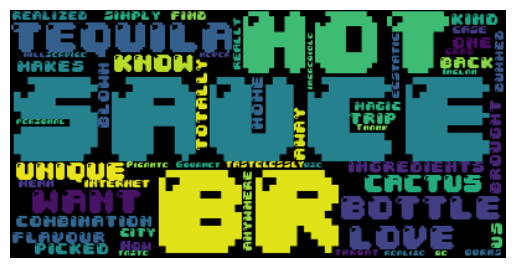

<Figure size 640x480 with 0 Axes>

In [57]:
# Melakukan tes pada review pertama
text = food.Text[10]
print(text)

wordcloud = WordCloud('./font.ttf').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("text1", format="png")

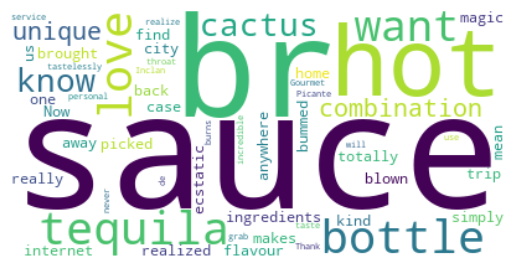

In [52]:
# Membuar stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["food", "was", "", "flavor", "flavors"])

# # Membuat image wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# # Menampilkan image worldcloud menggunakan matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("text2", format="png")

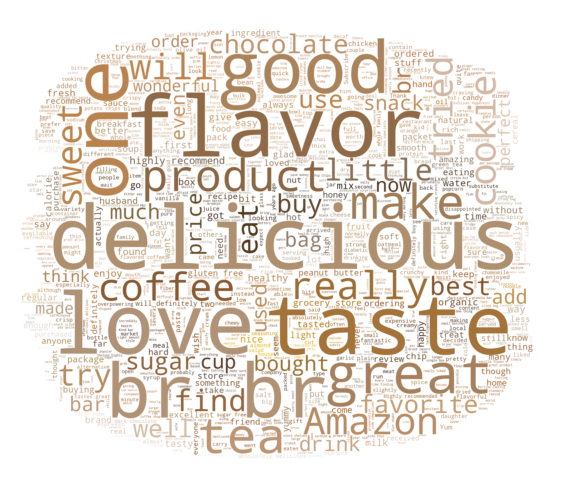

In [56]:
Del1 = " ".join(review for review in food[food["Summary"]=="Delicious!"].Text)
mask = np.array(Image.open("Del1.jpeg"))
wc_Del1 = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(Del1)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc_Del1.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.savefig("Del1_text.png", format="png")

                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

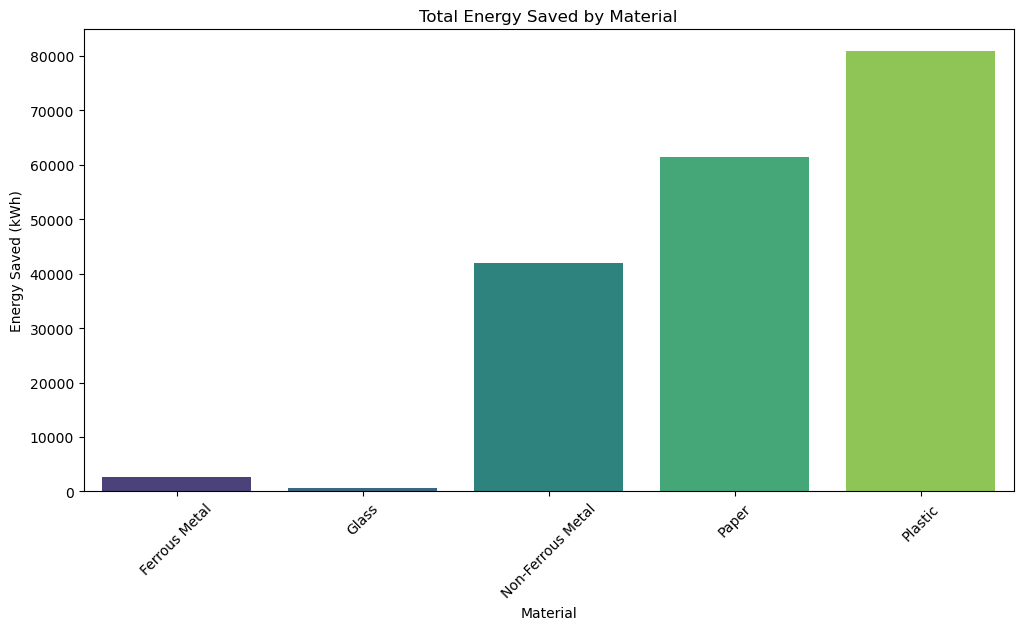

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menghitung total energi yang disimpan per material
energy_per_material = merged_data_filtered.groupby('Material')['Energy_Saved_kWh'].sum().reset_index()

# Membuat bar chart dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Material', y='Energy_Saved_kWh', data=energy_per_material, palette='viridis')
plt.title('Total Energy Saved by Material')
plt.xlabel('Material')
plt.ylabel('Energy Saved (kWh)')
plt.xticks(rotation=45)
plt.show()


In [72]:
import plotly.graph_objs as go
import pandas as pd

# Membaca data dari file CSV
waste_data = pd.read_csv('./2003_2017_waste.csv')

# Ambil data yang dibutuhkan untuk gauge chart
# Misalnya, kita akan membuat gauge chart untuk recycling rate dari "Food" waste tahun 2016
food_recycling_rate = waste_data[(waste_data['waste_type'] == 'Food') & (waste_data['year'] == 2016)]['recycling_rate'].values[0]

# Membuat gauge chart
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = food_recycling_rate,
    title = {'text': "Recycling Rate of Food Waste (2016)"},
    gauge = {
        'axis': {'range': [0, 1]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 0.2], 'color': "red"},
            {'range': [0.2, 0.4], 'color': "orange"},
            {'range': [0.4, 0.6], 'color': "yellow"},
            {'range': [0.6, 0.8], 'color': "lightgreen"},
            {'range': [0.8, 1], 'color': "green"}
        ]
    }
))

fig.show()


In [31]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat bubble chart
fig = px.scatter(
    merged_data_filtered,
    x='total_waste_generated_tonne',
    y='total_waste_recycled_tonne',
    size='Energy_Saved_kWh',
    color='Material',
    hover_name='Material',
    title='Bubble Chart of Waste Types',
    labels={
        'total_waste_generated_tonne': 'Total Waste Generated (tonne)',
        'total_waste_recycled_tonne': 'Total Waste Recycled (tonne)',
        'Energy_Saved_kWh': 'Energy Saved (kWh)'
    },
    size_max=60
)

# Menampilkan bubble chart
fig.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [32]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Membuat grafik dengan dua skala y-axis
fig = go.Figure()

# Menambahkan trace untuk total_waste_generated_tonne
fig.add_trace(go.Scatter(
    x=merged_data_filtered['year'],
    y=merged_data_filtered['total_waste_generated_tonne'],
    name='Total Waste Generated (tonne)',
    yaxis='y1'
))

# Menambahkan trace untuk Energy_Saved_kWh
fig.add_trace(go.Scatter(
    x=merged_data_filtered['year'],
    y=merged_data_filtered['Energy_Saved_kWh'],
    name='Energy Saved (kWh)',
    yaxis='y2'
))

# Mengatur layout untuk dua skala y-axis
fig.update_layout(
    title='Comparison of Total Waste Generated and Energy Saved by Year',
    xaxis_title='Year',
    yaxis=dict(
        title='Total Waste Generated (tonne)',
        side='left'
    ),
    yaxis2=dict(
        title='Energy Saved (kWh)',
        side='right',
        overlaying='y'
    )
)

# Menampilkan grafik
fig.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [33]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menampilkan data yang sudah digabungkan
print(merged_data)

# Membuat Grafik 
merged_data = merged_data.select_dtypes(include=['int64', 'float64'])

# Menampilkan Plot Heatmap untuk Waste Management
ax = sns.heatmap(merged_data.corr(), annot=True)
plt.title("Correlation Matrix of Total Wasted and Saved Energy")
plt.show()


                                 waste_type  waste_disposed_of_tonne  \
0                                      Food                   679900   
1                           Paper/Cardboard                   576000   
2                                  Plastics                   762700   
3                                       C&D                     9700   
4                       Horticultural waste                   111500   
..                                      ...                      ...   
220                          Ash and sludge                   214800   
221                                 Plastic                   763400   
222                         Textile/Leather                   141200   
223  Others (stones, ceramic, rubber, etc.)                   319300   
224                                   Total                  2980000   

     total_waste_recycled_tonne  total_waste_generated_tonne  recycling_rate  \
0                      111100.0                       7

In [81]:
import plotly.graph_objs as go
import pandas as pd

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')

# Pilih beberapa jenis waste_type dan tahun untuk ditampilkan dalam bullet graph
waste_types = ['Food', 'Plastics']
year = 2016

# Filter data untuk waste_types yang dipilih dan tahun yang diinginkan
filtered_data = waste_data[(waste_data['waste_type'].isin(waste_types)) & (waste_data['year'] == year)]

# Membuat bullet graph untuk setiap waste_type
fig = go.Figure()

for i, row in enumerate(filtered_data.itertuples()):
    fig.add_trace(go.Indicator(
        mode="number+gauge",
        value=row.recycling_rate,
        title={'text': f"{row.waste_type} (2016)", 'font': {'size': 7}},
        domain={'x': [0, 1], 'y': [0.8 - i*0.3, 1 - i*0.3]},
        gauge={
            'shape': "bullet",
            'axis': {'range': [0, 1]},
            'bar': {'color': "darkblue"},
            'steps': [
                {'range': [0, 0.2], 'color': "red"},
                {'range': [0.2, 0.4], 'color': "orange"},
                {'range': [0.4, 0.6], 'color': "yellow"},
                {'range': [0.6, 0.8], 'color': "lightgreen"},
                {'range': [0.8, 1], 'color': "green"}
            ],
            'threshold': {
                'line': {'color': "black", 'width': 2},
                'thickness': 0.75,
                'value': row.recycling_rate
            }
        }
    ))

# Menambahkan anotasi sebagai pengganti legend
annotations = [
    dict(x=0.5, y=-0.1, showarrow=False, text='Red: 0-0.2'),
    dict(x=0.5, y=-0.15, showarrow=False, text='Orange: 0.2-0.4'),
    dict(x=0.5, y=-0.2, showarrow=False, text='Yellow: 0.4-0.6'),
    dict(x=0.5, y=-0.25, showarrow=False, text='Light Green: 0.6-0.8'),
    dict(x=0.5, y=-0.3, showarrow=False, text='Green: 0.8-1')
]

fig.update_layout(height=500,width=500, annotations=annotations, showlegend=False, margin={'t': 10, 'b': 10})

fig.show()


In [75]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menampilkan data yang sudah digabungkan
print(merged_data_filtered)

# Membuat Horizontal Bar Chart untuk setiap jenis material
fig = go.Figure()

# Mendapatkan jumlah total material untuk menentukan proporsi y
num_materials = len(merged_data_filtered)

# Margin untuk memastikan indikator memiliki ruang yang cukup
margin = 0.05
height_per_indicator = (1 - margin * 2) / num_materials

for i, row in merged_data_filtered.iterrows():
    fig.add_trace(go.Bar(
        x=[row['Energy_Saved_kWh']],
        y=[row['Material']],
        orientation='h',
        name=row['Material'],
        #marker=dict(color='blue')
    ))

# Menambahkan langkah-langkah threshold dan bar di bawah batang
for i, row in merged_data_filtered.iterrows():
    fig.add_shape(
        type='rect',
        x0=0, x1=10000, y0=i - 0.4, y1=i + 0.4,
        fillcolor='lightgray', line=dict(width=0)
    )
    fig.add_shape(
        type='rect',
        x0=10000, x1=20000, y0=i - 0.4, y1=i + 0.4,
        fillcolor='gray', line=dict(width=0)
    )
    fig.add_shape(
        type='rect',
        x0=20000, x1=50000, y0=i - 0.4, y1=i + 0.4,
        fillcolor='darkgray', line=dict(width=0)
    )
    fig.add_shape(
        type='line',
        x0=30000, x1=30000, y0=i - 0.4, y1=i + 0.4,
        line=dict(color='red', width=2)
    )

# Menambahkan judul ke plot dan mengatur letaknya
fig.update_layout(
    title={
        'text': "Horizontal Graph of Total Waste and Saved Energy",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(title='Energy Saved (kWh)'),
    yaxis=dict(title='Material'),
    barmode='stack',
    height=800,
    margin={'t': 100, 'b': 20, 'l': 20, 'r': 20}
)

fig.show()


            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
6        Ferrous metal                     6000                   1351500.0   
7    Non-ferrous metal                     1300                     95900.0   
10               Glass                    57600                     14700.0   
16     Paper/Cardboard                   588500                    603700.0   
17            Plastics                   766800                     57800.0   
21       Ferrous metal                    15200                   1333300.0   
22   Non-ferrous metal                    19600                    160400.0   
25               Glass                    60600                     14600.0   
31     Paper/Cardboard                   590800                    646500.0   
32            Plastics                   789000     

In [36]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menampilkan data yang sudah digabungkan
print(merged_data_filtered)

# Membuat Radar Chart untuk setiap jenis material
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=merged_data_filtered['Energy_Saved_kWh'],
    theta=merged_data_filtered['Material'],
    fill='toself',
    name='Energy Saved (kWh)',
    marker=dict(color='blue')
))

# Menambahkan judul ke plot dan mengatur letaknya
fig.update_layout(
    title={
        'text': "Radar Chart of Total Waste and Saved Energy",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(merged_data_filtered['Energy_Saved_kWh'])]
        )
    ),
    showlegend=True,
    height=800,
    margin={'t': 100, 'b': 20, 'l': 20, 'r': 20}
)

fig.show()


            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
6        Ferrous metal                     6000                   1351500.0   
7    Non-ferrous metal                     1300                     95900.0   
10               Glass                    57600                     14700.0   
16     Paper/Cardboard                   588500                    603700.0   
17            Plastics                   766800                     57800.0   
21       Ferrous metal                    15200                   1333300.0   
22   Non-ferrous metal                    19600                    160400.0   
25               Glass                    60600                     14600.0   
31     Paper/Cardboard                   590800                    646500.0   
32            Plastics                   789000     

In [37]:
import pandas as pd
import plotly.graph_objects as go

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Menampilkan data yang sudah digabungkan
print(merged_data_filtered)

# Membuat Pie Chart untuk setiap jenis material
fig = go.Figure()

fig.add_trace(go.Pie(
    labels=merged_data_filtered['Material'],
    values=merged_data_filtered['Energy_Saved_kWh'],
    hoverinfo='label+percent+value',
    textinfo='label+percent',
    marker=dict(colors=px.colors.qualitative.Plotly)
))

# Menambahkan judul ke plot dan mengatur letaknya
fig.update_layout(
    title={
        'text': "Pie Chart of Total Waste and Saved Energy",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    height=800,
    margin={'t': 100, 'b': 20, 'l': 20, 'r': 20}
)

fig.show()


            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
6        Ferrous metal                     6000                   1351500.0   
7    Non-ferrous metal                     1300                     95900.0   
10               Glass                    57600                     14700.0   
16     Paper/Cardboard                   588500                    603700.0   
17            Plastics                   766800                     57800.0   
21       Ferrous metal                    15200                   1333300.0   
22   Non-ferrous metal                    19600                    160400.0   
25               Glass                    60600                     14600.0   
31     Paper/Cardboard                   590800                    646500.0   
32            Plastics                   789000     

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv', skiprows=2)

# Menampilkan beberapa baris pertama dari setiap data
print(waste_data.head())
print(energy_data.head())

# Mengatur data energy_data
# Transpose the data and reset the index
energy_data = energy_data.T.reset_index()
energy_data.columns = energy_data.iloc[0]  # Set the first row as the header
energy_data = energy_data.drop(energy_data.index[0])  # Drop the first row
energy_data = energy_data.rename(columns={2: 'energy_saved_kwh', 3: 'crude_oil_saved_barrels'})

# Rename the columns for better understanding
energy_data.columns = ['waste_type', 'Plastic', 'Glass', 'Ferrous Metal']

# Convert energy and oil saved columns to numeric
energy_data['energy_saved_kwh'] = energy_data['Plastic'].str.extract('(\d+\.?\d*)').astype(float)
energy_data['crude_oil_saved_barrels'] = energy_data['Plastic'].str.extract('(\d+\.?\d*)').astype(float)

# Keep only the relevant columns
energy_data = energy_data[['waste_type', 'energy_saved_kwh', 'crude_oil_saved_barrels']]

# Menampilkan data energy_data setelah diatur
print(energy_data.head())

# Menggabungkan kedua data berdasarkan jenis limbah
merged_data = pd.merge(waste_data, energy_data, on='waste_type', how='left')

# Menampilkan data gabungan
print(merged_data.head())

# Membuat visualisasi violin plot
plt.figure(figsize=(14, 7))
sns.violinplot(x='waste_type', y='recycling_rate', data=merged_data)
plt.title('Violin Plot of Recycling Rate by Waste Type')
plt.xticks(rotation=45)
plt.show()


            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
0                 Food                   679900                    111100.0   
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
3                  C&D                     9700                   1585700.0   
4  Horticultural waste                   111500                    209000.0   

   total_waste_generated_tonne  recycling_rate  year  
0                       791000            0.14  2016  
1                      1183100            0.51  2016  
2                       822200            0.07  2016  
3                      1595400            0.99  2016  
4                       320500            0.65  2016  
        Unnamed: 0  Unnamed: 1    Unnamed: 2     Unnamed: 3  \
0         material     Plastic         Glass  Ferrous Metal   
1     energy_saved    5774 Kwh        42 Kwh        642 Kwh   
2  cru

            waste_type  waste_disposed_of_tonne  total_waste_recycled_tonne  \
0                 Food                   679900                    111100.0   
1      Paper/Cardboard                   576000                    607100.0   
2             Plastics                   762700                     59500.0   
3                  C&D                     9700                   1585700.0   
4  Horticultural waste                   111500                    209000.0   

   total_waste_generated_tonne  recycling_rate  year  
0                       791000            0.14  2016  
1                      1183100            0.51  2016  
2                       822200            0.07  2016  
3                      1595400            0.99  2016  
4                       320500            0.65  2016  
        Unnamed: 0  Unnamed: 1    Unnamed: 2     Unnamed: 3  \
0         material     Plastic         Glass  Ferrous Metal   
1     energy_saved    5774 Kwh        42 Kwh        642 Kwh   
2  cru

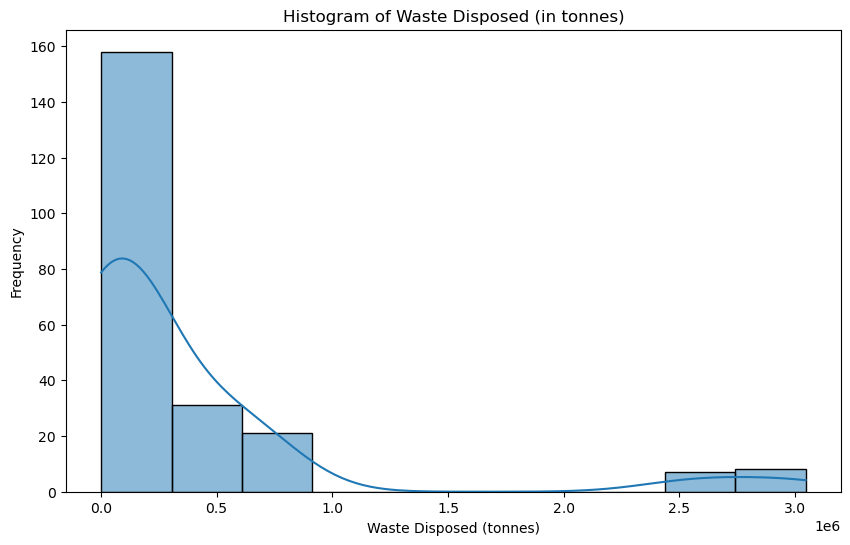

In [39]:
# Import library yang diperlukan
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv', skiprows=2)

# Menampilkan beberapa baris pertama dari setiap data
print(waste_data.head())
print(energy_data.head())

# Membuat histogram untuk waste_disposed_of_tonne
plt.figure(figsize=(10, 6))
sns.histplot(waste_data['waste_disposed_of_tonne'], bins=10, kde=True)
plt.title('Histogram of Waste Disposed (in tonnes)')
plt.xlabel('Waste Disposed (tonnes)')
plt.ylabel('Frequency')
plt.show()

In [40]:
import pandas as pd
import plotly.express as px

# Membaca data dari file CSV
waste_data = pd.read_csv('2003_2017_waste.csv')
energy_data = pd.read_csv('waste_energy_stat.csv')

# Membersihkan dan memformat data energy
data_cleaned = energy_data.iloc[3:5, 1:6].reset_index(drop=True)
data_cleaned.columns = ['Plastic', 'Glass', 'Ferrous Metal', 'Non-Ferrous Metal', 'Paper']
data_cleaned.index = ['energy_saved_kWh', 'crude_oil_saved_barrels']

for col in data_cleaned.columns:
    data_cleaned.at['energy_saved_kWh', col] = int(data_cleaned.at['energy_saved_kWh', col].split()[0])
    data_cleaned.at['crude_oil_saved_barrels', col] = float(data_cleaned.at['crude_oil_saved_barrels', col].split()[0])

data_cleaned = data_cleaned.transpose().reset_index()
data_cleaned.columns = ['Material', 'Energy_Saved_kWh', 'Crude_Oil_Saved_Barrels']

# Menggabungkan kedua dataset berdasarkan jenis material
material_mapping = {
    'Food': 'Food',
    'Paper/Cardboard': 'Paper',
    'Plastics': 'Plastic',
    'C&D': 'C&D',
    'Horticultural waste': 'Horticultural Waste',
    'Wood': 'Wood',
    'Ferrous metal': 'Ferrous Metal',
    'Non-ferrous metal': 'Non-Ferrous Metal',
    'Used slag': 'Used Slag',
    'Ash & Sludge': 'Ash & Sludge',
    'Glass': 'Glass',
    'Textile/Leather': 'Textile/Leather',
    'Scrap tyres': 'Scrap Tyres',
    'Others (stones, ceramics & rubber etc.)': 'Others',
    'Total': 'Total'
}

waste_data['Material'] = waste_data['waste_type'].map(material_mapping)
merged_data = pd.merge(waste_data, data_cleaned, on='Material', how='left')

# Mengubah kolom Energy_Saved_kWh menjadi numerik
merged_data['Energy_Saved_kWh'] = pd.to_numeric(merged_data['Energy_Saved_kWh'], errors='coerce')

# Memfilter hanya baris yang memiliki data lengkap
merged_data_filtered = merged_data.dropna(subset=['Energy_Saved_kWh'])

# Membuat funnel chart
fig = px.funnel(
    merged_data_filtered,
    x='Energy_Saved_kWh',
    y='Material',
    title='Funnel Chart of Energy Saved by Material',
    labels={'Energy_Saved_kWh': 'Energy Saved (kWh)', 'Material': 'Material'}
)

# Menampilkan funnel chart
fig.show()
